In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import os

#  Constants
img_height = 224  # Lowered from 512 for memory efficiency
img_width = 224
batch_size = 16
num_classes = 5

#  Load data efficiently

from google.colab import drive
drive.mount('/content/drive')

DATADIR = "/content/drive/MyDrive/HW1/yogaposes"
train_dir = os.path.join(DATADIR, "train_images")
test_dir = os.path.join(DATADIR, "test_images")


train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#  Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#  Define model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

#  Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#  Train
model.fit(train_ds, validation_data=test_ds, epochs=10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 977 files belonging to 5 classes.
Found 395 files belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2951 - loss: 1.7475 - val_accuracy: 0.5443 - val_loss: 1.1439
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6147 - loss: 1.0688 - val_accuracy: 0.7266 - val_loss: 0.7829
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 992ms/step - accuracy: 0.8019 - loss: 0.5932 - val_accuracy: 0.7620 - val_loss: 0.6511
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 982ms/step - accuracy: 0.9075 - loss: 0.2807 - val_accuracy: 0.8000 - val_loss: 0.7234
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9729 - loss: 0.1152 - val_accuracy: 0.7924 - val_loss: 0.9597
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9802 - loss: 0.0691 - val_accuracy: 0.7949 - val_loss: 0.8507
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9988 - loss: 0.0223 - val_accuracy: 0.7899 - val_loss: 1.0200
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9892 - loss: 0.0399 - val_accuracy: 0.8051 - val

In [4]:
#  Imports
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import numpy as np
import os

#  Constants
img_height = 224
img_width = 224
batch_size = 16
epochs = 10
num_classes = 5

# Paths (change if needed)
DATADIR = "/content/drive/MyDrive/HW1/yogaposes"
train_dir = os.path.join(DATADIR, "train_images")
test_dir = os.path.join(DATADIR, "test_images")

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

#  Save class names before batching/prefetch
class_names = train_ds.class_names

#  Cache, shuffle, batch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train
model.fit(train_ds, validation_data=test_ds, epochs=epochs)

# Evaluate model performance using sklearn
# Collect predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    pred_labels = tf.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(pred_labels.numpy())

# Classification Report
print("\n🧾 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Found 977 files belonging to 5 classes.
Found 395 files belonging to 5 classes.
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.2791 - loss: 3.7325 - val_accuracy: 0.5899 - val_loss: 1.2148
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 938ms/step - accuracy: 0.5849 - loss: 1.1074 - val_accuracy: 0.7089 - val_loss: 0.8268
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 61s 988ms/step - accuracy: 0.7663 - loss: 0.6946 - val_accuracy: 0.7671 - val_loss: 0.7036
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 940ms/step - accuracy: 0.8574 - loss: 0.4263 - val_accuracy: 0.8304 - val_loss: 0.7024
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 940ms/step - accuracy: 0.9441 - loss: 0.1858 - val_accuracy: 0.7646 - val_loss: 0.8146
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 936ms/step - accuracy: 0.9649 - loss: 0.1028 - val_accuracy: 0.8228 - val_loss: 1.0418
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 85s 987ms/step - accuracy: 0.9904 - loss: 0.0401 - val_accuracy: 0.8101 - val_loss: 0.9155
Epoch 8/10
62/62 ━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


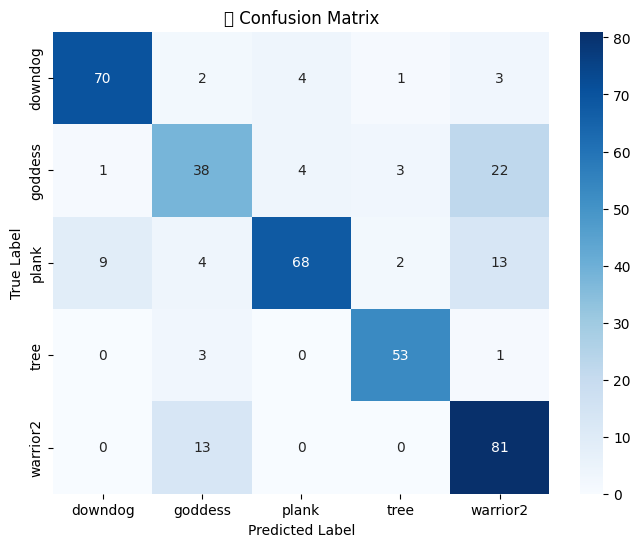

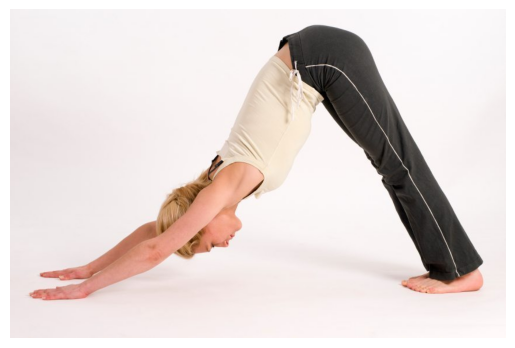

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

🧘 Predicted Pose: downdog
🔍 Confidence: 98.28%


In [7]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
from PIL import Image

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("🧘 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#  Predict Single Image
def predict_single_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img = img.resize((img_width, img_height))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(tf.nn.softmax(predictions[0])) * 100

    print(f"\n🧘 Predicted Pose: {class_names[predicted_class]}")
    print(f"🔍 Confidence: {confidence:.2f}%")

#  Example Call
plt.imshow(cv2.cvtColor(cv2.imread("/content/drive/MyDrive/HW1/yogaposes/train_images/downdog/00000128.jpg"), cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()
predict_single_image("/content/drive/MyDrive/HW1/yogaposes/train_images/downdog/00000134.jpg")


In [8]:
model.save('/content/drive/MyDrive/yoga_pose_classifier.keras')
